In [4]:
import pandas as pd

results_exams = pd.read_csv('exames.csv')
results_exams.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [12]:
results_exams.isnull().sum()

#that means the best way to fix this null value is removing it

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
from numpy import random

seed = 123143
random.seed(seed)

values_exams = results_exams.drop(columns=['id', 'diagnostico'])
diagnostico = results_exams.diagnostico
valores_exames_v1 = values_exams.drop(columns="exame_33")

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, diagnostico, test_size = 0.3)

In [22]:
from sklearn.dummy import DummyClassifier

seed = 123143
random.seed(seed)

classificador_bobo = DummyClassifier(strategy = "most_frequent")
classificador_bobo.fit(treino_x, treino_y)
print("Resultado da classificação boba %.2f%%" % (classificador_bobo.score(teste_x, teste_y)* 100))

Resultado da classificação boba 66.67%


In [23]:
from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y)
print("Resultado da classificação %.2f%%" % (classificador.score(teste_x, teste_y)* 100))

Resultado da classificação 91.81%


In [35]:
def grafico_violino(valores, inicio, fim):

    dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]], axis = 1)
    dados_plot = pd.melt(dados_plot, id_vars="diagnostico", 
                         var_name="exames",
                         value_name="valores")

    plt.figure(figsize=(10,10))

    sns.violinplot(x = "exames", y = "valores", hue = "diagnostico", 
                    data = dados_plot, split = True)

    plt.xticks(rotation = 90)

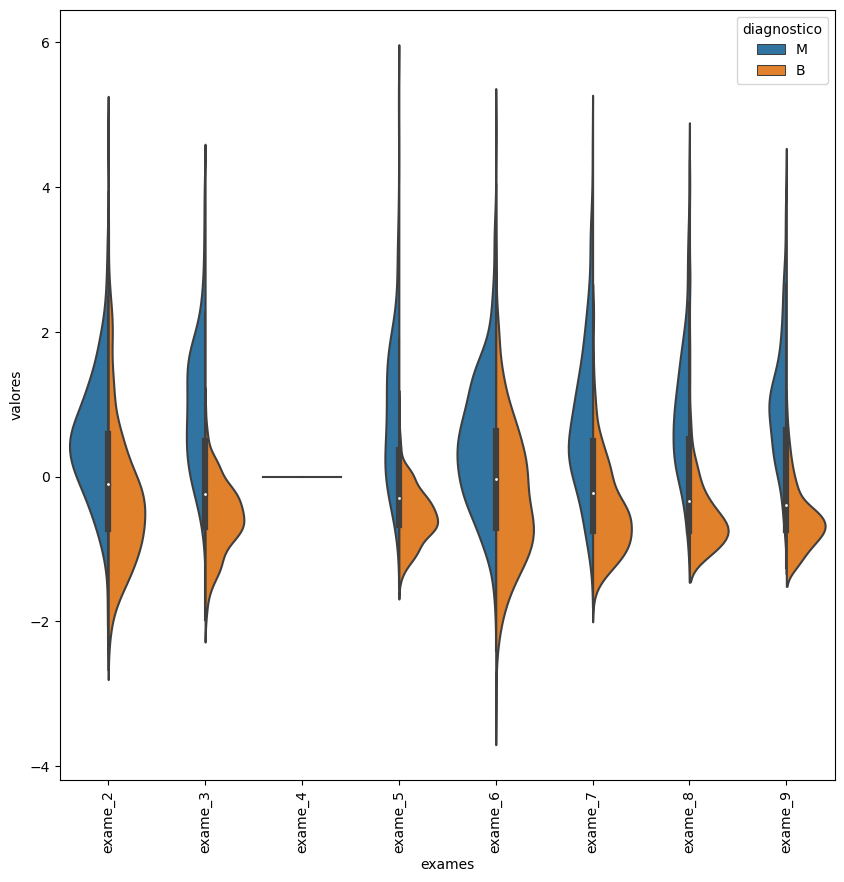

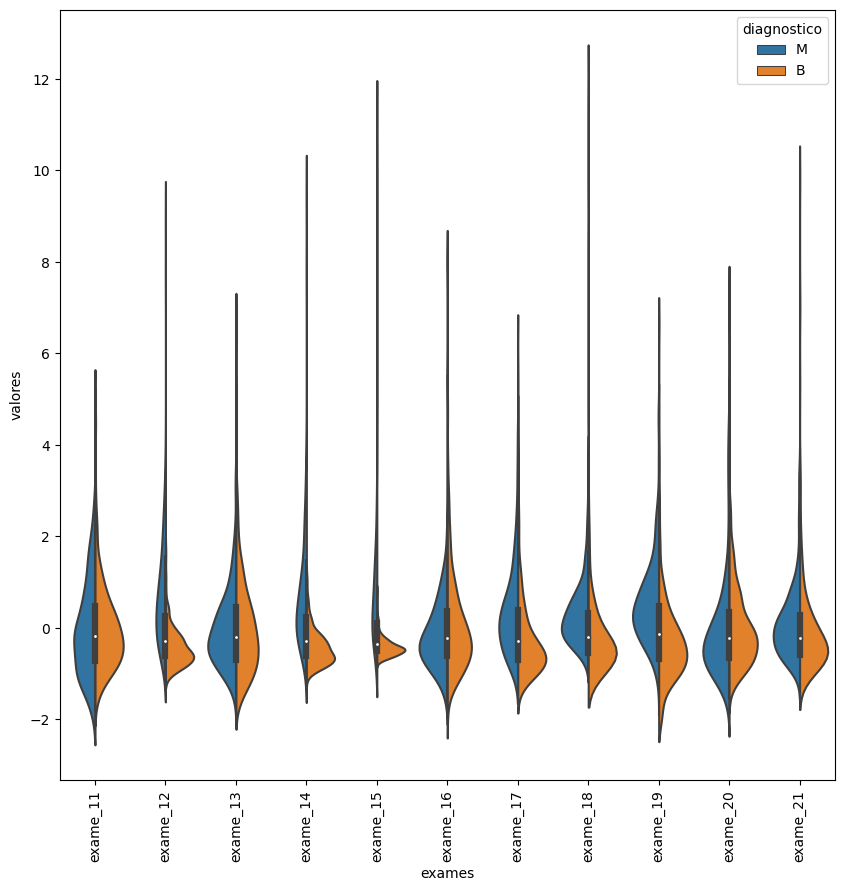

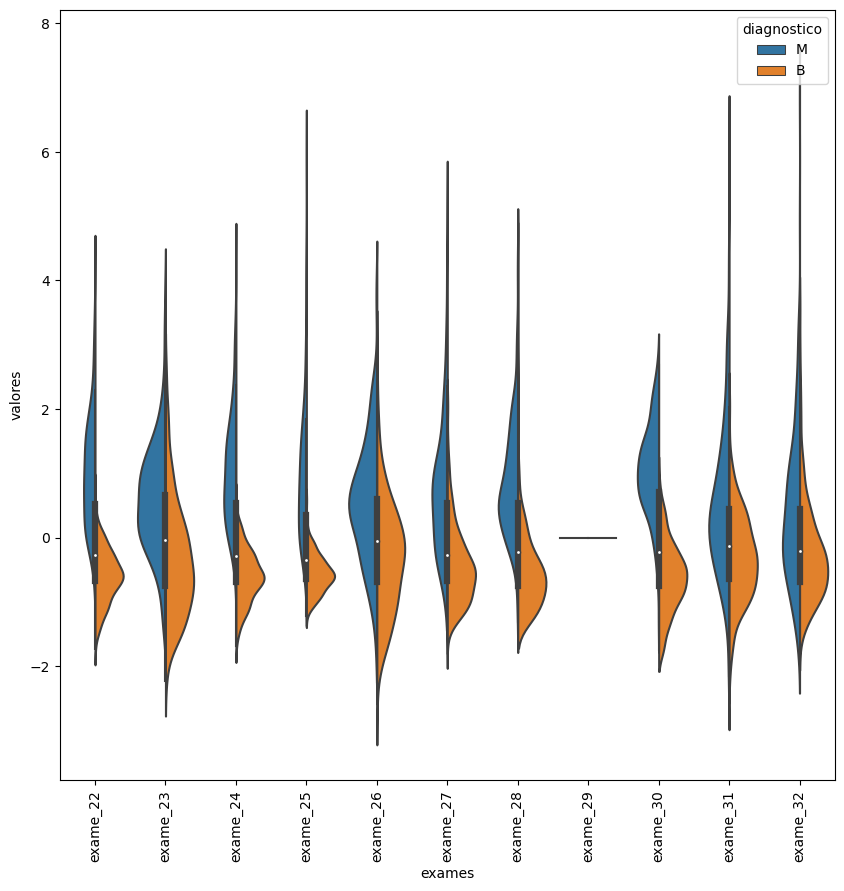

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2,
                                columns = valores_exames_v1.keys())

grafico_violino(valores_exames_v2, 1, 9)
grafico_violino(valores_exames_v2, 10, 21)
grafico_violino(valores_exames_v2, 21, 32)

In [41]:
valores_exames_v3 = valores_exames_v2.drop(columns=["exame_29","exame_4"])

In [42]:
def classificar(valores):
    
    SEED = 123143
    random.seed(SEED)

    treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnostico, test_size = 0.3)

    classificador = RandomForestClassifier(n_estimators = 100)
    classificador.fit(treino_x, treino_y)
    classificador.fit(treino_x, treino_y)
    
    print("Resultado da classificação %.2f%%" % (classificador.score(teste_x, teste_y)* 100))
    
classificar(valores_exames_v3)

Resultado da classificação 93.57%
